<a href="https://colab.research.google.com/github/caiobaptistaa/Credit-Risk/blob/main/Model_and_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model and Feature Selection #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp

pd.pandas.set_option('display.max_columns', None)

In [2]:
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_val = pd.read_csv("y_val.csv")
y_test = pd.read_csv("y_test.csv")


In [3]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv
0,1.0,0.092111,1.00000,1.000000,0.042767,1.000000,0.333333,0.210896,0.0003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.653261,0.581875,0.603981
1,1.0,0.130716,0.01977,1.000000,0.036556,0.329610,0.666667,0.147627,0.0003,0.5,0.000000,0.000000,0.5,0.0,1.0,0.732654,0.685767,0.697948
2,1.0,0.837121,1.00000,1.000000,1.000000,1.000000,0.000000,0.253076,0.0001,0.0,0.000000,0.000000,0.0,0.0,1.0,0.723292,0.673772,0.692636
3,1.0,0.120027,1.00000,1.000000,0.060768,0.239253,0.666667,0.063269,0.0001,0.5,0.000341,0.000105,0.5,0.0,1.0,0.642065,0.566814,0.526240
4,1.0,1.000000,0.02869,0.109917,0.868521,1.000000,0.333333,0.210896,0.0025,0.0,0.000000,0.000000,0.0,0.5,1.0,0.924013,0.917606,0.910001


# Filter Methods for Feature Selection #

### Target (binary) - Numerical Variables ###

In [4]:
num_vars = ["Term", "NoEmp", "CreateJob", "RetainedJob", "DisbursementGross", "GrAppv", "SBA_Appv"]

In [5]:
X_train[num_vars].head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,GrAppv,SBA_Appv
0,0.210896,0.0003,0.000000,0.000000,0.653261,0.581875,0.603981
1,0.147627,0.0003,0.000000,0.000000,0.732654,0.685767,0.697948
2,0.253076,0.0001,0.000000,0.000000,0.723292,0.673772,0.692636
3,0.063269,0.0001,0.000341,0.000105,0.642065,0.566814,0.526240
4,0.210896,0.0025,0.000000,0.000000,0.924013,0.917606,0.910001


In [6]:
y_train.head()

,MIS_Status_P I F
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


In [7]:
from scipy.stats import pointbiserialr

lista = []
for cols in num_vars:
    corr_matrix = pointbiserialr(y_train["MIS_Status_P I F"], X_train[cols])
    lista.append(corr_matrix)
print(lista)

[PointbiserialrResult(correlation=0.3143520583042729, pvalue=0.0), PointbiserialrResult(correlation=0.02874172777318287, pvalue=3.899183997814628e-115), PointbiserialrResult(correlation=-0.010482494129798174, pvalue=9.055066659015331e-17), PointbiserialrResult(correlation=-0.010989227343955469, pvalue=2.816200748708575e-18), PointbiserialrResult(correlation=0.15013313555029964, pvalue=0.0), PointbiserialrResult(correlation=0.18295882360317528, pvalue=0.0), PointbiserialrResult(correlation=0.197734419586471, pvalue=0.0)]


In [8]:
from tabulate import tabulate
A = np.array(lista)
A_df = pd.DataFrame(A)
A_df = A_df.rename(columns = {0 : "Correlation", 1: "P-value"})
vari = {"Variáveis": ["Term", "NoEmp", "CreateJob", "RetainedJob", "DisbursementGross", "GrAppv", "SBA_Appv"]}

var_df = pd.DataFrame(vari)
A_df = pd.merge(var_df, A_df, left_index= True, right_index = True)

print(tabulate(A_df, headers = "keys", tablefmt = "psql"))

+----+-------------------+---------------+--------------+
|    | Variáveis         |   Correlation |      P-value |
|----+-------------------+---------------+--------------|
|  0 | Term              |     0.314352  | 0            |
|  1 | NoEmp             |     0.0287417 | 3.89918e-115 |
|  2 | CreateJob         |    -0.0104825 | 9.05507e-17  |
|  3 | RetainedJob       |    -0.0109892 | 2.8162e-18   |
|  4 | DisbursementGross |     0.150133  | 0            |
|  5 | GrAppv            |     0.182959  | 0            |
|  6 | SBA_Appv          |     0.197734  | 0            |
+----+-------------------+---------------+--------------+


### Correlation analysis for numerical variables ###

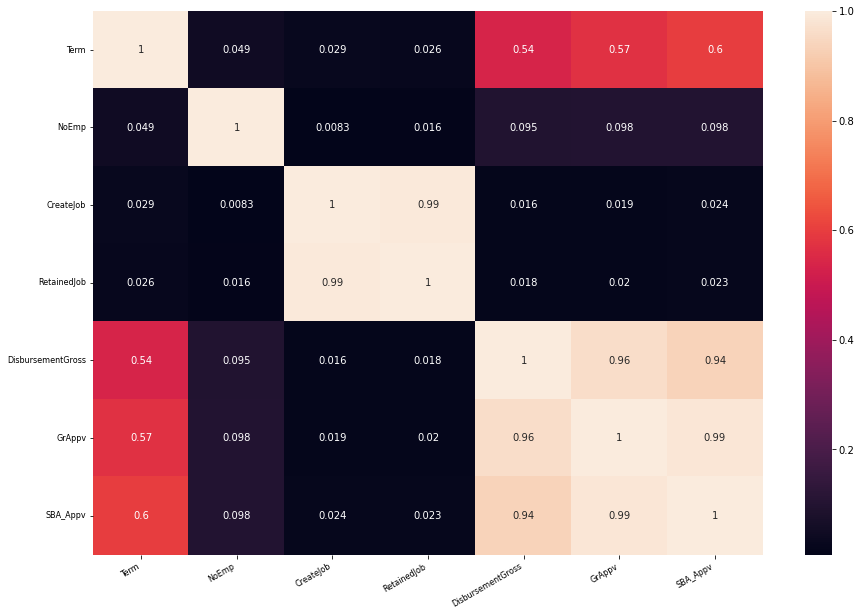

In [9]:
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = X_train[num_vars].corr(method = "pearson")
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

- Given the high correlation between loan variables (DisbursementGross, GrAppv, SBA_Appv), a PCA will be created.

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_train[["DisbursementGross", "SBA_Appv", "GrAppv"]])
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2
0,0.128647,0.032169,-0.014173
1,-0.031855,0.021441,-0.007063
2,-0.016812,0.025938,-0.010697
3,0.193183,-0.002392,0.018018
4,-0.397987,-0.012939,0.002925


In [11]:
from sklearn.decomposition import PCA
pca = PCA()
X_train[["PC1", "PC2", "PC3"]] = pd.DataFrame(pca.fit_transform(X_train[["DisbursementGross", "SBA_Appv", "GrAppv"]]),
                                                                    columns = ["DisbursementGross", "SBA_Appv", "GrAppv"])

X_val[["PC1", "PC2", "PC3"]] = pd.DataFrame(pca.fit_transform(X_val[["DisbursementGross", "SBA_Appv", "GrAppv"]]),
                                                                    columns = ["DisbursementGross", "SBA_Appv", "GrAppv"])

X_test[["PC1", "PC2", "PC3"]] = pd.DataFrame(pca.fit_transform(X_test[["DisbursementGross", "SBA_Appv", "GrAppv"]]),
                                                                    columns = ["DisbursementGross", "SBA_Appv", "GrAppv"])

In [12]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,PC1,PC2,PC3
0,1.0,0.092111,1.00000,1.000000,0.042767,1.000000,0.333333,0.210896,0.0003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.653261,0.581875,0.603981,0.128647,0.032169,-0.014173
1,1.0,0.130716,0.01977,1.000000,0.036556,0.329610,0.666667,0.147627,0.0003,0.5,0.000000,0.000000,0.5,0.0,1.0,0.732654,0.685767,0.697948,-0.031855,0.021441,-0.007063
2,1.0,0.837121,1.00000,1.000000,1.000000,1.000000,0.000000,0.253076,0.0001,0.0,0.000000,0.000000,0.0,0.0,1.0,0.723292,0.673772,0.692636,-0.016812,0.025938,-0.010697
3,1.0,0.120027,1.00000,1.000000,0.060768,0.239253,0.666667,0.063269,0.0001,0.5,0.000341,0.000105,0.5,0.0,1.0,0.642065,0.566814,0.526240,0.193183,-0.002392,0.018018
4,1.0,1.000000,0.02869,0.109917,0.868521,1.000000,0.333333,0.210896,0.0025,0.0,0.000000,0.000000,0.0,0.5,1.0,0.924013,0.917606,0.910001,-0.397987,-0.012939,0.002925


In [13]:
X_val.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,PC1,PC2,PC3
0,1.0,0.395217,0.033385,1.000000,0.120037,0.120739,0.666667,0.031634,0.0003,0.0,0.000000,0.000316,0.5,0.0,1.0,0.588999,0.493965,0.457241,0.306449,0.001207,0.013824
1,1.0,0.168342,1.000000,0.052230,0.448678,1.000000,0.333333,0.421793,0.0005,0.0,0.000000,0.000000,0.0,0.0,1.0,0.685650,0.624861,0.645374,0.060722,0.029675,-0.012204
2,1.0,0.040894,1.000000,0.027879,0.868521,0.329610,0.666667,0.147627,0.0003,0.0,0.000114,0.000316,0.5,0.5,1.0,0.489045,0.349625,0.376718,0.492438,0.035702,-0.025251
3,1.0,0.092111,1.000000,1.000000,0.042767,0.392264,0.333333,0.314587,0.0006,0.5,0.000000,0.000000,0.0,0.0,1.0,0.859259,0.841850,0.835777,-0.274260,-0.002492,0.002951
4,1.0,0.023090,0.042167,0.052224,1.000000,0.055979,0.666667,0.147627,0.0010,0.0,0.000000,0.001053,0.5,1.0,1.0,0.642065,0.566814,0.526240,0.193077,-0.002425,0.018025


In [14]:
X_test.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,PC1,PC2,PC3
0,1.0,0.506926,0.039995,1.000000,1.000000,1.000000,0.333333,0.316344,0.006001,0.0,0.000000,0.000000,0.0,0.5,1.0,1.050353,1.058389,0.942942,-0.562588,-0.095573,0.055114
1,1.0,0.506926,0.039995,0.109917,0.329846,1.000000,0.333333,0.316344,0.000100,0.5,0.000000,0.000000,0.0,0.0,1.0,0.737009,0.691325,0.709640,-0.044277,0.024647,-0.010080
2,1.0,0.017379,1.000000,0.159064,0.553261,0.297904,0.333333,0.210896,0.001800,0.0,0.000000,0.000000,0.0,0.0,1.0,0.777996,0.742951,0.753417,-0.122851,0.016444,-0.005572
3,1.0,0.013769,0.005939,0.109917,0.329846,0.392264,0.666667,0.147627,0.002000,0.0,0.000227,0.002316,1.0,1.0,1.0,0.838255,0.667270,0.622018,-0.018936,-0.108826,-0.017126
4,1.0,0.263698,0.016340,1.000000,0.035710,0.172908,0.666667,0.147627,0.000100,0.5,0.000000,0.000105,0.5,0.5,1.0,0.672181,0.607088,0.622018,0.093453,0.027250,-0.009726


In [15]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.97872305, 0.0181337 , 0.00314325])

### Target (binary) - Numerical Variables ###

In [16]:
num_vars = ["Term", "NoEmp", "CreateJob", "RetainedJob", "PC1"]

In [17]:
X_train[num_vars].head()

,Term,NoEmp,CreateJob,RetainedJob,PC1
0,0.210896,0.0003,0.000000,0.000000,0.128647
1,0.147627,0.0003,0.000000,0.000000,-0.031855
2,0.253076,0.0001,0.000000,0.000000,-0.016812
3,0.063269,0.0001,0.000341,0.000105,0.193183
4,0.210896,0.0025,0.000000,0.000000,-0.397987


In [18]:
y_train.head()

,MIS_Status_P I F
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


In [19]:
from scipy.stats import pointbiserialr

lista = []
for cols in num_vars:
    corr_matrix = pointbiserialr(y_train["MIS_Status_P I F"], X_train[cols])
    lista.append(corr_matrix)
print(lista)

[PointbiserialrResult(correlation=0.3143520583042729, pvalue=0.0), PointbiserialrResult(correlation=0.02874172777318287, pvalue=3.899183997814628e-115), PointbiserialrResult(correlation=-0.010482494129798174, pvalue=9.055066659015331e-17), PointbiserialrResult(correlation=-0.010989227343955469, pvalue=2.816200748708575e-18), PointbiserialrResult(correlation=-0.18415921262503931, pvalue=0.0)]


In [20]:
from tabulate import tabulate
A = np.array(lista)
A_df = pd.DataFrame(A)
A_df = A_df.rename(columns = {0 : "Correlation", 1: "P-value"})
vari = {"Variáveis": ["Term", "NoEmp", "CreateJob", "RetainedJob", "PC_DGS"]}

var_df = pd.DataFrame(vari)
A_df = pd.merge(var_df, A_df, left_index= True, right_index = True)

print(tabulate(A_df, headers = "keys", tablefmt = "psql"))

+----+-------------+---------------+--------------+
|    | Variáveis   |   Correlation |      P-value |
|----+-------------+---------------+--------------|
|  0 | Term        |     0.314352  | 0            |
|  1 | NoEmp       |     0.0287417 | 3.89918e-115 |
|  2 | CreateJob   |    -0.0104825 | 9.05507e-17  |
|  3 | RetainedJob |    -0.0109892 | 2.8162e-18   |
|  4 | PC_DGS      |    -0.184159  | 0            |
+----+-------------+---------------+--------------+


### Target (Binary) - Categorical Variables ###

In [21]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,PC1,PC2,PC3
0,1.0,0.092111,1.00000,1.000000,0.042767,1.000000,0.333333,0.210896,0.0003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.653261,0.581875,0.603981,0.128647,0.032169,-0.014173
1,1.0,0.130716,0.01977,1.000000,0.036556,0.329610,0.666667,0.147627,0.0003,0.5,0.000000,0.000000,0.5,0.0,1.0,0.732654,0.685767,0.697948,-0.031855,0.021441,-0.007063
2,1.0,0.837121,1.00000,1.000000,1.000000,1.000000,0.000000,0.253076,0.0001,0.0,0.000000,0.000000,0.0,0.0,1.0,0.723292,0.673772,0.692636,-0.016812,0.025938,-0.010697
3,1.0,0.120027,1.00000,1.000000,0.060768,0.239253,0.666667,0.063269,0.0001,0.5,0.000341,0.000105,0.5,0.0,1.0,0.642065,0.566814,0.526240,0.193183,-0.002392,0.018018
4,1.0,1.000000,0.02869,0.109917,0.868521,1.000000,0.333333,0.210896,0.0025,0.0,0.000000,0.000000,0.0,0.5,1.0,0.924013,0.917606,0.910001,-0.397987,-0.012939,0.002925


In [22]:
from sklearn.feature_selection import chi2

In [23]:
cat_vars = ["City", "State", "Zip", "Bank", "BankState", "NAICS", "ApprovalFY", "NewExist", "UrbanRural", "RevLineCr", "LowDoc"]

In [24]:
scores = chi2(X_train[cat_vars], y_train)
scores

(array([1.41795770e+01, 1.64443145e+00, 9.49762376e+02, 5.14772601e+03,
        2.87826669e-01, 2.71015736e+03, 9.84569044e+02, 7.32574489e+01,
        4.34392193e+03, 2.79799180e+03, 5.48894827e+02]),
 array([1.66164296e-004, 1.99718538e-001, 1.49415957e-208, 0.00000000e+000,
        5.91616629e-001, 0.00000000e+000, 4.05906156e-216, 1.13794899e-017,
        0.00000000e+000, 0.00000000e+000, 2.18983046e-121]))

In [25]:
p_value = pd.Series(scores[1],index=X_train[cat_vars].columns)
p_value.sort_values(ascending=True,inplace=True)

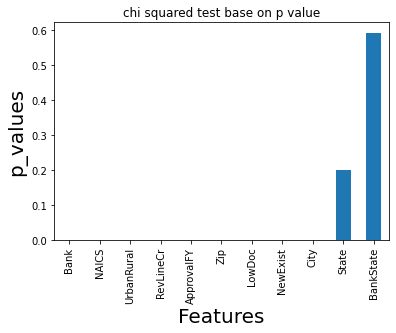

In [26]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

## Dropping Variables with Low Significance ##

In [27]:
X_train = X_train.drop(["State", "BankState", "DisbursementGross", "GrAppv", "SBA_Appv", "PC2", "PC3"], axis = 1)
X_val = X_val.drop(["State", "BankState", "DisbursementGross", "GrAppv", "SBA_Appv", "PC2", "PC3"], axis = 1 )
X_test = X_test.drop(["State", "BankState", "DisbursementGross", "GrAppv", "SBA_Appv", "PC2", "PC3"], axis = 1 )

In [28]:
X_train.head()

,City,Zip,Bank,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,PC1
0,1.0,1.00000,1.000000,1.000000,0.333333,0.210896,0.0003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.128647
1,1.0,0.01977,1.000000,0.329610,0.666667,0.147627,0.0003,0.5,0.000000,0.000000,0.5,0.0,1.0,-0.031855
2,1.0,1.00000,1.000000,1.000000,0.000000,0.253076,0.0001,0.0,0.000000,0.000000,0.0,0.0,1.0,-0.016812
3,1.0,1.00000,1.000000,0.239253,0.666667,0.063269,0.0001,0.5,0.000341,0.000105,0.5,0.0,1.0,0.193183
4,1.0,0.02869,0.109917,1.000000,0.333333,0.210896,0.0025,0.0,0.000000,0.000000,0.0,0.5,1.0,-0.397987


# Model Selection #

In [29]:
X_train.head()

,City,Zip,Bank,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,PC1
0,1.0,1.00000,1.000000,1.000000,0.333333,0.210896,0.0003,0.0,0.000000,0.000000,0.0,0.0,0.0,0.128647
1,1.0,0.01977,1.000000,0.329610,0.666667,0.147627,0.0003,0.5,0.000000,0.000000,0.5,0.0,1.0,-0.031855
2,1.0,1.00000,1.000000,1.000000,0.000000,0.253076,0.0001,0.0,0.000000,0.000000,0.0,0.0,1.0,-0.016812
3,1.0,1.00000,1.000000,0.239253,0.666667,0.063269,0.0001,0.5,0.000341,0.000105,0.5,0.0,1.0,0.193183
4,1.0,0.02869,0.109917,1.000000,0.333333,0.210896,0.0025,0.0,0.000000,0.000000,0.0,0.5,1.0,-0.397987


### Random Forest - RF ###

GRID SEARCH

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

best_accuracy_mean = 0

for max_depth in [3, 6, 8]:
    for n_estimators in [50, 100, 150]:
                RF = RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators)
                accuracy = cross_val_score(RF, X_val, y_val.values.ravel(), cv = 3, scoring = "accuracy")
                accuracy_mean = accuracy.mean()
                if accuracy_mean > best_accuracy_mean:
                    best_accuracy_mean = accuracy_mean
                    best_parameters = {"Nodes": max_depth, "Estimators": n_estimators}
print("Best Accuracy: {:.3f}".format(best_accuracy_mean))
print("Best Parameters: {}".format(best_parameters))

best_logloss_mean = 1

for max_depth in [3, 6, 8]:
    for n_estimators in [50, 100, 150]:
                RF = RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators)
                logloss = cross_val_score(RF, X_val, y_val.values.ravel(), cv = 3, scoring = "neg_log_loss")
                logloss_mean = logloss.mean()
                logloss_mean = logloss_mean*(-1)
                if logloss_mean < best_logloss_mean:
                    best_logloss_mean = logloss_mean
                    best_parameters = {"Nodes": max_depth, "Estimators": n_estimators}
print("Best Logloss: {:.3f}".format(best_logloss_mean))
print("Best Parameters: {}".format(best_parameters))

Best Accuracy: 0.896
Best Parameters: {'Nodes': 8, 'Estimators': 150}
Best Logloss: 0.264
Best Parameters: {'Nodes': 8, 'Estimators': 100}


Best Model Evaluation

In [31]:
RF_val = RandomForestClassifier(max_depth = 8, n_estimators = 50)

####### Scores - Seleçao do modelo e Verificaçao do Overfitting pela comparaçao train-validation scores #####

from sklearn.model_selection import cross_validate

CV_RF = cross_validate(RF_val, X_val, y_val.values.ravel(), cv = 5, scoring = ("accuracy", "f1", "neg_log_loss", "roc_auc"), return_train_score = True)

CV_RF_df = pd.DataFrame(CV_RF)

CV_RF_df = CV_RF_df.drop(columns = ["fit_time", "score_time"])

RF_val_accuracy = (CV_RF_df["test_accuracy"]).mean()
RF_val_logloss = (CV_RF_df["test_neg_log_loss"]).mean()
RF_val_logloss = RF_val_logloss*(-1)
RF_val_f1 = (CV_RF_df["test_f1"]).mean()
RF_val_auc = (CV_RF_df["test_roc_auc"]).mean()

RF_train_accuracy = (CV_RF_df["train_accuracy"]).mean()
RF_train_logloss = (CV_RF_df["train_neg_log_loss"]).mean()
RF_train_logloss = RF_train_logloss*(-1)
RF_train_f1 = (CV_RF_df["train_f1"]).mean()
RF_train_auc = (CV_RF_df["train_roc_auc"]).mean()

lista_rf = [["Accuracy", RF_train_accuracy, RF_val_accuracy], ["LogLoss", RF_train_logloss, RF_val_logloss], ["F1", RF_train_f1
                                                                                                    , RF_val_f1],
           ["AUC", RF_train_auc, RF_val_auc]]

head = ["Train", "Cross-Validation"]

print(tabulate(lista_rf, headers = head, tablefmt = "grid"))


+----------+----------+--------------------+
|          |    Train |   Cross-Validation |
+==========+==========+====================+
| Accuracy | 0.899379 |           0.897082 |
+----------+----------+--------------------+
| LogLoss  | 0.260771 |           0.265442 |
+----------+----------+--------------------+
| F1       | 0.940891 |           0.939566 |
+----------+----------+--------------------+
| AUC      | 0.92744  |           0.922395 |
+----------+----------+--------------------+


ROC Curve point (threshold) validation

Confusion Matrix - Train: [[ 62531  47960]
 [ 15735 503188]]
Confusion Matrix - Val: [[ 13241  10516]
 [  3407 107711]]
Best Threshold: 0.7728125627080367
True Positive Rate: 0.8847981425151641
False Positive Rate: 0.16054215599612745


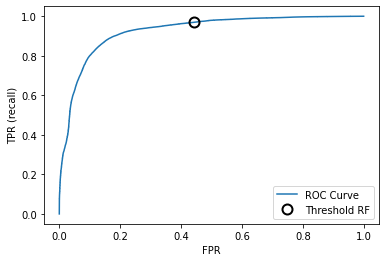

In [32]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

RF.fit(X_train, y_train.values.ravel())

RF_predict_train = RF.predict(X_train)

RF_predict_val = RF.predict(X_val)

confusion_train = confusion_matrix(y_train, RF_predict_train)
confusion_val = confusion_matrix(y_val, RF_predict_val)

print("Confusion Matrix - Train: {}".format(confusion_train))
print("Confusion Matrix - Val: {}".format(confusion_val))

### Validaçao para ROC ###

RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_val, RF.predict_proba(X_val)[:,1])
plt.plot(RF_fpr, RF_tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero

RF_close_default = np.argmin(np.abs(RF_thresholds - 0.5))
plt.plot(RF_fpr[RF_close_default], RF_tpr[RF_close_default], "o", markersize=10,
label="Threshold RF", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

RF_optimal_idx = np.argmax(RF_tpr - RF_fpr)
RF_optimal_threshold = RF_thresholds[RF_optimal_idx]
RF_optimal_tpr = RF_tpr[RF_optimal_idx]
RF_optimal_fpr = RF_fpr[RF_optimal_idx]
print("Best Threshold: {}".format(RF_optimal_threshold))
print("True Positive Rate: {}".format(RF_optimal_tpr))
print("False Positive Rate: {}".format(RF_optimal_fpr))


In [33]:
y_pred_RF = RF_predict_val
y_prednew_RF = (RF.predict_proba(X_val)[:, 1] >= 0.77).astype(int)

print("Accuracy RF new threshold: {:.3f}".format(accuracy_score(y_val, y_prednew_RF)))
print("Accuracy RF - 0.5: {:.3f}".format(accuracy_score(y_val, y_pred_RF)))

print("F1 RF new threshold: {:.3f}".format(f1_score(y_val, y_prednew_RF)))
print("F1 RF - 0.5: {:.3f}".format(f1_score(y_val, y_pred_RF)))

print("AUC: {:.3f}".format(roc_auc_score(y_val, y_pred_RF)))

Accuracy RF new threshold: 0.878
Accuracy RF - 0.5: 0.897
F1 RF new threshold: 0.923
F1 RF - 0.5: 0.939
AUC: 0.763


### Extreme Gradient Boosting - XGBM ###

GRID SEARCH

In [34]:
import xgboost as xgb

best_accuracy_mean = 0

for max_depth in [3, 6, 8]:
    for estimators in [25, 50, 100]:
        for colsample_bytree in [1]:
            for subsamples in [0.5]:
                XGBC = xgb.XGBClassifier(max_depth = max_depth, n_estimators = estimators, subsamples = subsamples, colsample_bytree = colsample_bytree, verbosity = 0)
                accuracy = cross_val_score(XGBC, X_val, y_val.values.ravel(), cv = 3, scoring = "accuracy")
                accuracy_mean = accuracy.mean()
                if accuracy_mean > best_accuracy_mean:
                    best_accuracy_mean = accuracy_mean
                    best_parameters = {"Nodes": max_depth, "Estimators": estimators, "Colsample_bytree": colsample_bytree, "Subsamples": subsamples}
print("Best Accuracy: {:.3f}".format(best_accuracy_mean))
print("Best Parameters: {}".format(best_parameters))

best_logloss_mean = 1

for max_depth in [3, 6, 8]:
    for estimators in [25, 50, 100]:
        for colsample_bytree in [1]:
            for subsamples in [0.5]:
                XGBC = xgb.XGBClassifier(max_depth = max_depth, n_estimators = estimators, subsamples = subsamples, colsample_bytree = colsample_bytree, verbosity = 0)
                logloss = cross_val_score(XGBC, X_val, y_val.values.ravel(), cv = 3, scoring = "neg_log_loss")
                logloss_mean = logloss.mean()
                logloss_mean = logloss_mean*(-1)
                if logloss_mean < best_logloss_mean:
                    best_logloss_mean = logloss_mean
                    best_parameters = {"Nodes": max_depth, "Estimators": estimators, "Colsample_bytree": colsample_bytree, "Subsamples": subsamples}
print("Best Logloss: {:.3f}".format(best_logloss_mean))
print("Best Parameters: {}".format(best_parameters))

Best Accuracy: 0.942
Best Parameters: {'Nodes': 8, 'Estimators': 100, 'Colsample_bytree': 1, 'Subsamples': 0.5}
Best Logloss: 0.151
Best Parameters: {'Nodes': 8, 'Estimators': 100, 'Colsample_bytree': 1, 'Subsamples': 0.5}


Best Model Evaluation

In [35]:
XGBC_val = xgb.XGBClassifier(max_depth = 8, n_estimators = 100, subsamples = 0.5, colsample_bytree = 1, verbosity = 0)

####### Scores - Seleçao do modelo e Verificaçao do Overfitting pela comparaçao train-validation scores #####

from sklearn.model_selection import cross_validate

CV_XGBC = cross_validate(XGBC_val, X_val, y_val.values.ravel(), cv = 3, scoring = ("accuracy", "f1", "neg_log_loss", "roc_auc"), return_train_score = True)

CV_XGBC_df = pd.DataFrame(CV_XGBC)

CV_XGBC_df = CV_XGBC_df.drop(columns = ["fit_time", "score_time"])

XGBC_val_accuracy = (CV_XGBC_df["test_accuracy"]).mean()
XGBC_val_logloss = (CV_XGBC_df["test_neg_log_loss"]).mean()
XGBC_val_logloss = XGBC_val_logloss*(-1)
XGBC_val_f1 = (CV_XGBC_df["test_f1"]).mean()
XGBC_val_auc = (CV_XGBC_df["test_roc_auc"]).mean()

XGBC_trainval_accuracy = (CV_XGBC_df["train_accuracy"]).mean()
XGBC_trainval_logloss = (CV_XGBC_df["train_neg_log_loss"]).mean()
XGBC_trainval_logloss = XGBC_trainval_logloss*(-1)
XGBC_trainval_f1 = (CV_XGBC_df["train_f1"]).mean()
XGBC_trainval_auc = (CV_XGBC_df["train_roc_auc"]).mean()

lista_xgbc = [["Accuracy", XGBC_trainval_accuracy, XGBC_val_accuracy], ["LogLoss", XGBC_trainval_logloss, XGBC_val_logloss], ["F1", XGBC_trainval_f1
                                                                                                    , XGBC_val_f1],
           ["AUC", XGBC_trainval_auc, XGBC_val_auc]]

head = ["Train", "Cross-Validation"]

print(tabulate(lista_xgbc, headers = head, tablefmt = "grid"))

+----------+----------+--------------------+
|          |    Train |   Cross-Validation |
+==========+==========+====================+
| Accuracy | 0.957242 |           0.94188  |
+----------+----------+--------------------+
| LogLoss  | 0.119118 |           0.150517 |
+----------+----------+--------------------+
| F1       | 0.974209 |           0.964978 |
+----------+----------+--------------------+
| AUC      | 0.985616 |           0.974319 |
+----------+----------+--------------------+


ROC Curve point (threshold) validation

Confusion Matrix - Train: [[ 90961  19530]
 [ 13347 505576]]
Confusion Matrix - Val: [[ 19287   4470]
 [  3036 108082]]
Best Threshold: 0.8153842687606812
True Positive Rate: 0.9193470004859698
False Positive Rate: 0.06271835669486889


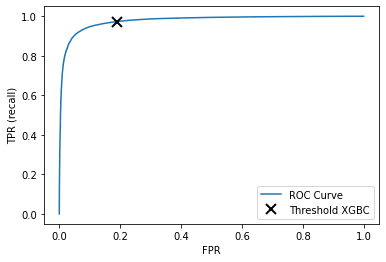

In [36]:
XGBC = xgb.XGBClassifier(max_depth = 8, n_estimators = 100, subsamples = 0.5, colsample_bytree = 1, verbosity = 0)

XGBC.fit(X_train, y_train.values.ravel())

XGBC_predict_train = XGBC.predict(X_train)

XGBC_predict_val = XGBC.predict(X_val)

XGBC_confusion_train = confusion_matrix(y_train, XGBC_predict_train)
XGBC_confusion_val = confusion_matrix(y_val, XGBC_predict_val)

print("Confusion Matrix - Train: {}".format(XGBC_confusion_train))
print("Confusion Matrix - Val: {}".format(XGBC_confusion_val))

### Validaçao para ROC ###

XGBC_fpr, XGBC_tpr, XGBC_thresholds = roc_curve(y_val, XGBC.predict_proba(X_val)[:,1])
plt.plot(XGBC_fpr, XGBC_tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero

XGBC_close_default = np.argmin(np.abs(XGBC_thresholds - 0.5))
plt.plot(XGBC_fpr[XGBC_close_default], XGBC_tpr[XGBC_close_default], "x", markersize=10,
label="Threshold XGBC", fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

XGBC_optimal_idx = np.argmax(XGBC_tpr - XGBC_fpr)
XGBC_optimal_threshold = XGBC_thresholds[XGBC_optimal_idx]
XGBC_optimal_tpr = XGBC_tpr[XGBC_optimal_idx]
XGBC_optimal_fpr = XGBC_fpr[XGBC_optimal_idx]
print("Best Threshold: {}".format(XGBC_optimal_threshold))
print("True Positive Rate: {}".format(XGBC_optimal_tpr))
print("False Positive Rate: {}".format(XGBC_optimal_fpr))

In [37]:
y_pred_XGBC = XGBC_predict_val
y_prednew_XGBC = (XGBC.predict_proba(X_val)[:, 1] >= 0.82).astype(int)


print("Accuracy XGBC new threshold: {:.3f}".format(accuracy_score(y_val, y_prednew_XGBC)))
print("Accuracy XGBC - 0.5: {:.3f}".format(accuracy_score(y_val, y_pred_XGBC)))

print("F1 XGBC new threshold: {:.3f}".format(f1_score(y_val, y_prednew_XGBC)))
print("F1 XGBC - 0.5: {:.3f}".format(f1_score(y_val, y_pred_XGBC)))

print("XGBC - AUC: {:.3f}".format(roc_auc_score(y_val, y_pred_XGBC)))

Accuracy XGBC new threshold: 0.921
Accuracy XGBC - 0.5: 0.944
F1 XGBC new threshold: 0.951
F1 XGBC - 0.5: 0.966
XGBC - AUC: 0.892


#### Comparison between the two models ####

In [38]:
from tabulate import tabulate
data = [["Accuracy", RF_val_accuracy, XGBC_val_accuracy],
        ["LogLoss", RF_val_logloss, XGBC_val_logloss], 
        ["F1", RF_val_f1, XGBC_val_f1],
        ["AUC", RF_val_auc, XGBC_val_auc]]

head2 = ["Scores", "Random Forest", "XGB"]

print(tabulate(data, headers = head2, tablefmt = "grid"))

+----------+-----------------+----------+
| Scores   |   Random Forest |      XGB |
+==========+=================+==========+
| Accuracy |        0.897082 | 0.94188  |
+----------+-----------------+----------+
| LogLoss  |        0.265442 | 0.150517 |
+----------+-----------------+----------+
| F1       |        0.939566 | 0.964978 |
+----------+-----------------+----------+
| AUC      |        0.922395 | 0.974319 |
+----------+-----------------+----------+


### Extreme Gradient Boosting ###

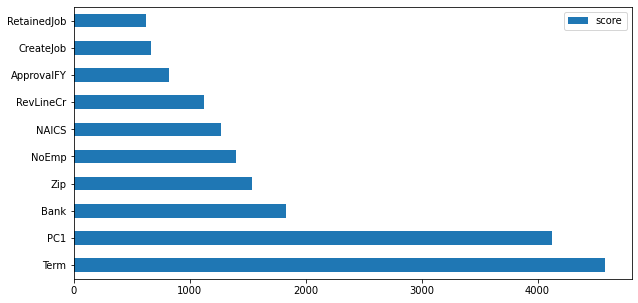

In [39]:
feature_importance = XGBC.get_booster().get_score(importance_type='weight')
keys = list(feature_importance.keys())
values = list(feature_importance.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (10,5))

##### Test Dataset ####

In [40]:
XGBC_predict_train
XGBC_predict_test = XGBC.predict(X_test)

XGBC_predproba_train = XGBC.predict_proba(X_train)
XGBC_predproba_test = XGBC.predict_proba(X_test)

In [41]:
from sklearn.metrics import log_loss

XGBC_train_accuracy = accuracy_score(y_train, XGBC_predict_train)
XGBC_train_f1 = f1_score(y_train, XGBC_predict_train)
XGBC_train_auc = roc_auc_score(y_train, XGBC_predict_train)
XGBC_train_logloss = log_loss(y_train, XGBC_predproba_train)

XGBC_test_accuracy = accuracy_score(y_test, XGBC_predict_test)
XGBC_test_f1 = f1_score(y_test, XGBC_predict_test)
XGBC_test_auc = roc_auc_score(y_test, XGBC_predict_test)
XGBC_test_logloss = log_loss(y_test, XGBC_predproba_test)

tablefinish = [["Accuracy", XGBC_train_accuracy, XGBC_val_accuracy, XGBC_test_accuracy],
        ["F1 test", XGBC_train_f1, XGBC_val_f1, XGBC_test_f1 ], 
        ["AUC", XGBC_train_auc, XGBC_val_auc, XGBC_test_auc], ["Logloss", XGBC_train_logloss, XGBC_val_logloss, XGBC_test_logloss]]

head2 = ["Train", "Validation", "Test"]

print(tabulate(tablefinish, headers = head2, tablefmt = "grid"))

+----------+----------+--------------+----------+
|          |    Train |   Validation |     Test |
+==========+==========+==============+==========+
| Accuracy | 0.947766 |     0.94188  | 0.945038 |
+----------+----------+--------------+----------+
| F1 test  | 0.968509 |     0.964978 | 0.966963 |
+----------+----------+--------------+----------+
| AUC      | 0.898761 |     0.974319 | 0.89322  |
+----------+----------+--------------+----------+
| Logloss  | 0.137414 |     0.150517 | 0.143349 |
+----------+----------+--------------+----------+
